In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import os
import io
import pdb
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
import pyswarms as ps
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

C:\Users\ykond\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [3]:
#Machine learning models
vectorizer=CountVectorizer(stop_words='english',lowercase=True)
MNBC=MultinomialNB(alpha=0.5743650,class_prior=None,fit_prior=False)    #Multinomial Naive BAYES
SGDC=SGDClassifier(loss="hinge", alpha=0.0001, max_iter=1000, tol=1e-3, epsilon=0.1)   #Stochastic Gradient Descent
DTC=DecisionTreeClassifier(criterion = "entropy", splitter = "best")  #entropy can also be used  #Decision Tree
RFC=RandomForestClassifier(criterion = "entropy")  #entropy must be used after gini    #Random Forest
MLPC=MLPClassifier(hidden_layer_sizes=5,max_iter=10000,solver='lbfgs')  #Multi-layer Perceptron
ABC=AdaBoostClassifier(n_estimators=100)          #AdaBoost Classifier
GBC=GradientBoostingClassifier(n_estimators=100)        #GradientBoosting Classifier
models=[MNBC,SGDC,DTC,RFC,MLPC]
split_list=[5,4,3,2]

In [4]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root, filename)
            lines=[]
            f=io.open(path, 'r', encoding='latin1')
            for line in f:
                lines.append(line)
            f.close
            message='\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows=[]
    index=[]
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
    return pd.DataFrame(rows, index=index)

data=pd.DataFrame({'message':[], 'class':[]})

data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Enron/Spam','Spam'))
data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Enron/Ham','Ham'))
X=data['message']
y=data['class']


'''Pre-processing'''
IDF = TfidfVectorizer().fit_transform(X)
Tr_tokens=vectorizer.fit_transform(X)


scores=np.array

In [5]:
#Applying Stratified K_fold_Cross_Validation
def SKF_Split(x):
    skf=StratifiedKFold(n_splits=x,shuffle=True)
    #Stratified K_Fold_spliting
    for train_index, test_index in skf.split(Tr_tokens,y):
        global X_train, X_test, y_train, y_test
        X_train, X_test = Tr_tokens[train_index], Tr_tokens[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [6]:
def GBC_Classification():
    print("Gradientboost Classifier Training and testing is running")
    GBC.fit(X_train, y_train)
    pred=GBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = GBC.score(X_train, y_train)*100, GBC.score(X_test, y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [7]:
def ABC_Classification():
    print("Adaboost Classifier Training and testing is running")
    ABC.fit(X_train, y_train)
    pred=ABC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = ABC.score(X_train, y_train)*100, ABC.score(X_test, y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [8]:
#Multinomial Naive Bayes Calssification
def MNB_Classification():
    print("Multinomial Naive BAYES's Training and testing is running")
    MNBC.fit(X_train,y_train)
    pred=MNBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = MNBC.score(X_train,y_train)*100, MNBC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [9]:
#Stochastic Gradient Descent (SGD) Calssification
def SGDC_Classification():
    print("Stochastic Gradient descent training and testing is running")
    SGDC.fit(X_train,y_train)
    pred=SGDC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SGDC.score(X_train,y_train)*100, SGDC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [10]:
#Decision Tree Classification
def DTC_Classification():
    print("Decision Tree Classifier Training and testing is running")
    DTC.fit(X_train,y_train)
    pred=DTC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = DTC.score(X_train,y_train)*100, DTC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [11]:
#Random Forest Classification
def RFC_Classification():
    print("Random Forest Training and testing is running")
    RFC.fit(X_train,y_train)
    pred=RFC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = RFC.score(X_train,y_train)*100, RFC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [12]:
#Multi-layer Perceptron Calssification
def MLPC_Classification():
    print("Multi-layer Perceptron Training and testing is running")
    MLPC.fit(X_train,y_train)
    pred=MLPC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = MLPC.score(X_train,y_train)*100, MLPC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

Stratified K-Fold has been applied for 5 Splits
Multinomial Naive BAYES's Training and testing is running
Stochastic Gradient descent training and testing is running
Decision Tree Classifier Training and testing is running
Random Forest Training and testing is running
Multi-layer Perceptron Training and testing is running
Gradientboost Classifier Training and testing is running
Adaboost Classifier Training and testing is running
Stratified K-Fold has been applied for 4 Splits
Multinomial Naive BAYES's Training and testing is running
Stochastic Gradient descent training and testing is running
Decision Tree Classifier Training and testing is running
Random Forest Training and testing is running
Multi-layer Perceptron Training and testing is running
Gradientboost Classifier Training and testing is running
Adaboost Classifier Training and testing is running
Stratified K-Fold has been applied for 3 Splits
Multinomial Naive BAYES's Training and testing is running
Stochastic Gradient descent 

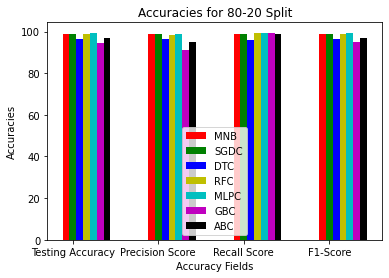

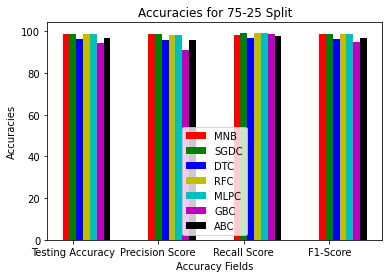

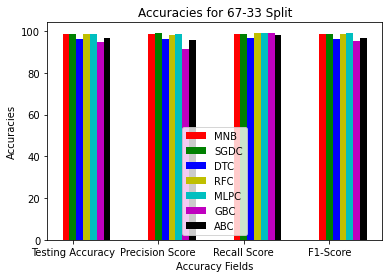

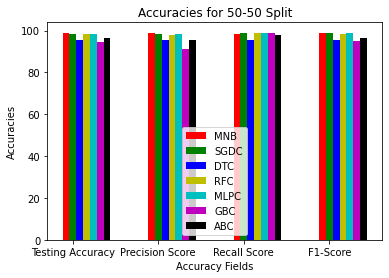

,Classifier,80-20 Split,Precision Score,Recall Score,F1-Score,75-25 Split,Precision Score,Recall Score,F1-Score,67-33 Split,Precision Score,Recall Score,F1-Score,50-50 Split,Precision Score,Recall Score,F1-Score
0,Stochastic Gradient Descent,98.768546,98.578062,99.009035,98.793078,98.836795,98.585671,99.137328,98.860730,98.816094,98.862841,98.810981,98.836904,98.587621,98.252719,98.985778,98.617886
1,Multinomial Naive BAYES,98.738872,98.718695,98.805013,98.761835,98.480712,98.575765,98.437864,98.506766,98.682571,98.842714,98.566183,98.704255,98.623227,98.750000,98.542784,98.646283
2,Random Forest,98.724036,98.408104,99.096473,98.751089,98.587537,98.152425,99.090697,98.619329,98.629161,98.332465,98.985837,98.658069,98.344312,97.987741,98.775938,98.380261
3,Decision Tree,96.246291,96.570926,96.036141,96.302791,96.225519,95.801615,96.829098,96.312616,96.359267,96.270478,96.590313,96.430130,95.555160,95.586351,95.686640,95.636470
4,Multi-later Perceptron,99.080119,98.783666,99.417080,99.099361,98.777448,98.292570,99.323852,98.805520,98.905109,98.627042,99.230635,98.927918,98.747849,98.583208,98.962462,98.772471
5,GradientBoosting Classifier,94.673591,91.069519,99.271349,94.993725,94.575668,91.168887,98.927489,94.889858,94.739185,91.381536,99.003322,95.039866,94.587858,91.161942,98.962462,94.902180
6,AdaBoost Classifier,96.721068,95.160383,98.571845,96.836077,96.818991,95.996340,97.831662,96.905312,96.670821,95.566922,98.006645,96.771409,96.498724,95.283447,97.971555,96.608806


In [13]:
def Main_Base_model():
    MNB_ACC_LST=list()
    SGDC_ACC_LST=list()
    DTC_ACC_LST=list()
    RFC_ACC_LST=list()
    MLPC_ACC_LST=list()
    GBC_ACC_LST=list()
    ABC_ACC_LST=list()
    
    for ele in split_list:
        print("Stratified K-Fold has been applied for {} Splits".format(ele))
        SKF_Split(ele)
        acc1=MNB_Classification()
        acc2=SGDC_Classification()
        acc3=DTC_Classification()
        acc4=RFC_Classification()
        acc5=MLPC_Classification()
        acc6=GBC_Classification()
        acc7=ABC_Classification()
        MNB_ACC_LST.append(acc1*100)
        SGDC_ACC_LST.append(acc2*100)
        DTC_ACC_LST.append(acc3*100)
        RFC_ACC_LST.append(acc4*100)
        MLPC_ACC_LST.append(acc5*100)
        GBC_ACC_LST.append(acc6*100)
        ABC_ACC_LST.append(acc7*100)
        
    Accuracy_Table=[('Stochastic Gradient Descent',SGDC_ACC_LST[0][0],SGDC_ACC_LST[0][1],SGDC_ACC_LST[0][2],SGDC_ACC_LST[0][3],SGDC_ACC_LST[1][0],SGDC_ACC_LST[1][1],SGDC_ACC_LST[1][2],SGDC_ACC_LST[1][3],SGDC_ACC_LST[2][0],SGDC_ACC_LST[2][1],SGDC_ACC_LST[2][2],SGDC_ACC_LST[2][3],SGDC_ACC_LST[3][0],SGDC_ACC_LST[3][1],SGDC_ACC_LST[3][2],SGDC_ACC_LST[3][3]),
                ('Multinomial Naive BAYES',MNB_ACC_LST[0][0],MNB_ACC_LST[0][1],MNB_ACC_LST[0][2],MNB_ACC_LST[0][3],MNB_ACC_LST[1][0],MNB_ACC_LST[1][1],MNB_ACC_LST[1][2],MNB_ACC_LST[1][3],MNB_ACC_LST[2][0],MNB_ACC_LST[2][1],MNB_ACC_LST[2][2],MNB_ACC_LST[2][3],MNB_ACC_LST[3][0],MNB_ACC_LST[3][1],MNB_ACC_LST[3][2],MNB_ACC_LST[3][3]),
                ('Random Forest',RFC_ACC_LST[0][0],RFC_ACC_LST[0][1],RFC_ACC_LST[0][2],RFC_ACC_LST[0][3],RFC_ACC_LST[1][0],RFC_ACC_LST[1][1],RFC_ACC_LST[1][2],RFC_ACC_LST[1][3],RFC_ACC_LST[2][0],RFC_ACC_LST[2][1],RFC_ACC_LST[2][2],RFC_ACC_LST[2][3],RFC_ACC_LST[3][0],RFC_ACC_LST[3][1],RFC_ACC_LST[3][2],RFC_ACC_LST[3][3]),
                ('Decision Tree',DTC_ACC_LST[0][0],DTC_ACC_LST[0][1],DTC_ACC_LST[0][2],DTC_ACC_LST[0][3],DTC_ACC_LST[1][0],DTC_ACC_LST[1][1],DTC_ACC_LST[1][2],DTC_ACC_LST[1][3],DTC_ACC_LST[2][0],DTC_ACC_LST[2][1],DTC_ACC_LST[2][2],DTC_ACC_LST[2][3],DTC_ACC_LST[3][0],DTC_ACC_LST[3][1],DTC_ACC_LST[3][2],DTC_ACC_LST[3][3]),
                ('Multi-later Perceptron',MLPC_ACC_LST[0][0],MLPC_ACC_LST[0][1],MLPC_ACC_LST[0][2],MLPC_ACC_LST[0][3],MLPC_ACC_LST[1][0],MLPC_ACC_LST[1][1],MLPC_ACC_LST[1][2],MLPC_ACC_LST[1][3],MLPC_ACC_LST[2][0],MLPC_ACC_LST[2][1],MLPC_ACC_LST[2][2],MLPC_ACC_LST[2][3],MLPC_ACC_LST[3][0],MLPC_ACC_LST[3][1],MLPC_ACC_LST[3][2],MLPC_ACC_LST[3][3]),
                ('GradientBoosting Classifier',GBC_ACC_LST[0][0],GBC_ACC_LST[0][1],GBC_ACC_LST[0][2],GBC_ACC_LST[0][3],GBC_ACC_LST[1][0],GBC_ACC_LST[1][1],GBC_ACC_LST[1][2],GBC_ACC_LST[1][3],GBC_ACC_LST[2][0],GBC_ACC_LST[2][1],GBC_ACC_LST[2][2],GBC_ACC_LST[2][3],GBC_ACC_LST[3][0],GBC_ACC_LST[3][1],GBC_ACC_LST[3][2],GBC_ACC_LST[3][3]),
                ('AdaBoost Classifier',ABC_ACC_LST[0][0],ABC_ACC_LST[0][1],ABC_ACC_LST[0][2],ABC_ACC_LST[0][3],ABC_ACC_LST[1][0],ABC_ACC_LST[1][1],ABC_ACC_LST[1][2],ABC_ACC_LST[1][3],ABC_ACC_LST[2][0],ABC_ACC_LST[2][1],ABC_ACC_LST[2][2],ABC_ACC_LST[2][3],ABC_ACC_LST[3][0],ABC_ACC_LST[3][1],ABC_ACC_LST[3][2],ABC_ACC_LST[3][3])
               ]
    Result_table=pd.DataFrame(Accuracy_Table,columns=["Classifier","80-20 Split","Precision Score","Recall Score","F1-Score","75-25 Split","Precision Score","Recall Score","F1-Score","67-33 Split","Precision Score","Recall Score","F1-Score","50-50 Split","Precision Score","Recall Score","F1-Score"])
    
    '''80-20 Split Accuracy Plot '''
    N = 4
    ind = np.arange(N) 
    width = 0.08

    MNB_vals = [MNB_ACC_LST[0][0],MNB_ACC_LST[0][1],MNB_ACC_LST[0][2],MNB_ACC_LST[0][3]]
    bar1 = plt.bar(ind, MNB_vals, width, color = 'r')

    SGDC_vals = [SGDC_ACC_LST[0][0],SGDC_ACC_LST[0][1],SGDC_ACC_LST[0][2],SGDC_ACC_LST[0][3]]
    bar2 = plt.bar(ind+width, SGDC_vals, width, color='g')

    DTC_vals = [DTC_ACC_LST[0][0],DTC_ACC_LST[0][1],DTC_ACC_LST[0][2],DTC_ACC_LST[0][3]]
    bar3 = plt.bar(ind+width*2, DTC_vals, width, color = 'b')

    RFC_vals = [RFC_ACC_LST[0][0],RFC_ACC_LST[0][1],RFC_ACC_LST[0][2],RFC_ACC_LST[0][3]]
    bar4 = plt.bar(ind+width*3, RFC_vals, width, color='y')
    
    MLPC_vals = [MLPC_ACC_LST[0][0],MLPC_ACC_LST[0][1],MLPC_ACC_LST[0][2],MLPC_ACC_LST[0][3]]
    bar5 = plt.bar(ind+width*4, MLPC_vals, width, color='c')
    
    GBC_vals = [GBC_ACC_LST[0][0],GBC_ACC_LST[0][1],GBC_ACC_LST[0][2],GBC_ACC_LST[0][3]]
    bar6 = plt.bar(ind+width*5, GBC_vals, width, color='m')
    
    ABC_vals = [ABC_ACC_LST[0][0],ABC_ACC_LST[0][1],ABC_ACC_LST[0][2],ABC_ACC_LST[0][3]]
    bar7 = plt.bar(ind+width*6, ABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 80-20 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('MNB', 'SGDC', 'DTC', 'RFC', 'MLPC', 'GBC', 'ABC') )
    plt.show()
    
    '''75-25 Split Accuracy Plot '''

    MNB_vals = [MNB_ACC_LST[1][0],MNB_ACC_LST[1][1],MNB_ACC_LST[1][2],MNB_ACC_LST[1][3]]
    bar1 = plt.bar(ind, MNB_vals, width, color = 'r')

    SGDC_vals = [SGDC_ACC_LST[1][0],SGDC_ACC_LST[1][1],SGDC_ACC_LST[1][2],SGDC_ACC_LST[1][3]]
    bar2 = plt.bar(ind+width, SGDC_vals, width, color='g')

    DTC_vals = [DTC_ACC_LST[1][0],DTC_ACC_LST[1][1],DTC_ACC_LST[1][2],DTC_ACC_LST[1][3]]
    bar3 = plt.bar(ind+width*2, DTC_vals, width, color = 'b')

    RFC_vals = [RFC_ACC_LST[1][0],RFC_ACC_LST[1][1],RFC_ACC_LST[1][2],RFC_ACC_LST[1][3]]
    bar4 = plt.bar(ind+width*3, RFC_vals, width, color='y')
    
    MLPC_vals = [MLPC_ACC_LST[1][0],MLPC_ACC_LST[1][1],MLPC_ACC_LST[1][2],MLPC_ACC_LST[1][3]]
    bar5 = plt.bar(ind+width*4, MLPC_vals, width, color='c')
    
    GBC_vals = [GBC_ACC_LST[1][0],GBC_ACC_LST[1][1],GBC_ACC_LST[1][2],GBC_ACC_LST[1][3]]
    bar6 = plt.bar(ind+width*5, GBC_vals, width, color='m')
    
    ABC_vals = [ABC_ACC_LST[1][0],ABC_ACC_LST[1][1],ABC_ACC_LST[1][2],ABC_ACC_LST[1][3]]
    bar7 = plt.bar(ind+width*6, ABC_vals, width, color='k')
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 75-25 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('MNB', 'SGDC', 'DTC', 'RFC', 'MLPC', 'GBC', 'ABC') )
    plt.show()
    
    
    '''67-33 Split Accuracy Plot '''

    MNB_vals = [MNB_ACC_LST[2][0],MNB_ACC_LST[2][1],MNB_ACC_LST[2][2],MNB_ACC_LST[2][3]]
    bar1 = plt.bar(ind, MNB_vals, width, color = 'r')

    SGDC_vals = [SGDC_ACC_LST[2][0],SGDC_ACC_LST[2][1],SGDC_ACC_LST[2][2],SGDC_ACC_LST[2][3]]
    bar2 = plt.bar(ind+width, SGDC_vals, width, color='g')

    DTC_vals = [DTC_ACC_LST[2][0],DTC_ACC_LST[2][1],DTC_ACC_LST[2][2],DTC_ACC_LST[2][3]]
    bar3 = plt.bar(ind+width*2, DTC_vals, width, color = 'b')

    RFC_vals = [RFC_ACC_LST[2][0],RFC_ACC_LST[2][1],RFC_ACC_LST[2][2],RFC_ACC_LST[2][3]]
    bar4 = plt.bar(ind+width*3, RFC_vals, width, color='y')
    
    MLPC_vals = [MLPC_ACC_LST[2][1],MLPC_ACC_LST[2][1],MLPC_ACC_LST[2][2],MLPC_ACC_LST[2][3]]
    bar5 = plt.bar(ind+width*4, MLPC_vals, width, color='c')
    
    GBC_vals = [GBC_ACC_LST[2][0],GBC_ACC_LST[2][1],GBC_ACC_LST[2][2],GBC_ACC_LST[2][3]]
    bar6 = plt.bar(ind+width*5, GBC_vals, width, color='m')
    
    ABC_vals = [ABC_ACC_LST[2][0],ABC_ACC_LST[2][1],ABC_ACC_LST[2][2],ABC_ACC_LST[2][3]]
    bar7 = plt.bar(ind+width*6, ABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 67-33 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('MNB', 'SGDC', 'DTC', 'RFC', 'MLPC', 'GBC', 'ABC') )
    plt.show()
    
    
    
    '''50-50 Split Accuracy Plot '''

    MNB_vals = [MNB_ACC_LST[3][0],MNB_ACC_LST[3][1],MNB_ACC_LST[3][2],MNB_ACC_LST[3][3]]
    bar1 = plt.bar(ind, MNB_vals, width, color = 'r')

    SGDC_vals = [SGDC_ACC_LST[3][0],SGDC_ACC_LST[3][1],SGDC_ACC_LST[3][2],SGDC_ACC_LST[3][3]]
    bar2 = plt.bar(ind+width, SGDC_vals, width, color='g')

    DTC_vals = [DTC_ACC_LST[3][0],DTC_ACC_LST[3][1],DTC_ACC_LST[3][2],DTC_ACC_LST[3][3]]
    bar3 = plt.bar(ind+width*2, DTC_vals, width, color = 'b')

    RFC_vals = [RFC_ACC_LST[3][0],RFC_ACC_LST[3][1],RFC_ACC_LST[3][2],RFC_ACC_LST[3][3]]
    bar4 = plt.bar(ind+width*3, RFC_vals, width, color='y')
    
    MLPC_vals = [MLPC_ACC_LST[3][1],MLPC_ACC_LST[3][1],MLPC_ACC_LST[3][2],MLPC_ACC_LST[3][3]]
    bar5 = plt.bar(ind+width*4, MLPC_vals, width, color='c')
    
    GBC_vals = [GBC_ACC_LST[3][0],GBC_ACC_LST[3][1],GBC_ACC_LST[3][2],GBC_ACC_LST[3][3]]
    bar6 = plt.bar(ind+width*5, GBC_vals, width, color='m')
    
    ABC_vals = [ABC_ACC_LST[3][0],ABC_ACC_LST[3][1],ABC_ACC_LST[3][2],ABC_ACC_LST[3][3]]
    bar7 = plt.bar(ind+width*6, ABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 50-50 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('MNB', 'SGDC', 'DTC', 'RFC', 'MLPC', 'GBC', 'ABC') )
    plt.show()
    
    
    
    return Result_table
Main_Base_model()